In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
y = df['YearsExperience']
x = df['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.33, random_state = 42)
print(type(x_train))

<class 'pandas.core.series.Series'>


In [39]:
model = LinearRegression()
x_train_array = np.array(x_train.values.reshape(-1, 1).tolist())
x_test_array = np.array(x_test.values.reshape(-1, 1).tolist())
model = model.fit(x_train_array, y_train)
preds = model.predict(x_test_array)

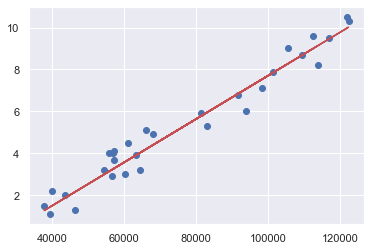

In [40]:
plt.scatter(x, y)
plt.plot(x_test, preds, c='r')

In [41]:
print("R^2:                     ", r2_score(y_test, preds))
print("MSE:                     ", mean_squared_error(y_test, preds))
print("Residual Standard Error: ", np.std((preds, y_test.values), ddof=4))

R^2:                      0.9543596763509609
MSE:                      0.3742340950745381
Residual Standard Error:  3.0107478262332754


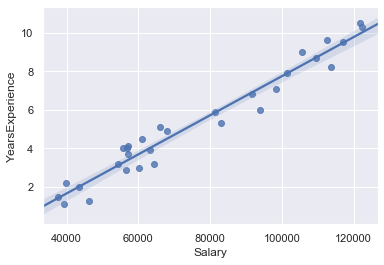

In [42]:
sns.set(color_codes=True)
xy_train = pd.concat([x_train, y_train], axis = 1)
sns.regplot(x="Salary", y="YearsExperience", data=df, ci=95)